<a href="https://colab.research.google.com/github/pilipandr770/ISTVuser/blob/main/ISTVusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import gdown

# Встановіть шлях до файлу
url = 'https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D'
output = 'archive.zip'
gdown.download(url, output, quiet=False)

# Розархівуйте файл
import zipfile

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/data')


Downloading...
From: https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D
To: /content/archive.zip
100%|██████████| 782k/782k [00:00<00:00, 8.15MB/s]


In [3]:
import gdown

# Завантаження файлу з Google Drive
url = 'https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D'
output = 'archive.zip'
gdown.download(url, output, quiet=False)

# Розпакування файлу
import zipfile

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

# Перегляд файлів у директорії після розпакування
import os
extracted_files = os.listdir('/content/data')
extracted_files


Downloading...
From: https://drive.google.com/uc?id=121xd_NVxBIiDevkqnNUDpDdwj8jcR41D
To: /content/archive.zip
100%|██████████| 782k/782k [00:00<00:00, 10.1MB/s]


['internet_service_churn.csv']

In [5]:
import pandas as pd

# Перевіримо шлях до CSV файлу та завантажимо його
csv_file_path = '/content/internet_service_churn.csv'
data = pd.read_csv(csv_file_path)

# Виведемо перші кілька рядків для перевірки
data.head()


,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [6]:
from sklearn.preprocessing import StandardScaler

# Заповнення пропущених значень у колонці reamining_contract середнім
data['reamining_contract'].fillna(data['reamining_contract'].mean(), inplace=True)

# Заповнення пропущених значень у колонках download_avg і upload_avg середнім
data['download_avg'].fillna(data['download_avg'].mean(), inplace=True)
data['upload_avg'].fillna(data['upload_avg'].mean(), inplace=True)

# Нормалізація числових колонок
scaler = StandardScaler()
data[['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']] = scaler.fit_transform(
    data[['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']])

# Перевіримо результат після обробки
data.head()


<ipython-input-6-175f4793bdce>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reamining_contract'].fillna(data['reamining_contract'].mean(), inplace=True)
<ipython-input-6-175f4793bdce>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,4.668335,0.458372,-9.865937e-01,-0.335818,-0.558048,-0.193209,0,0
1,18,0,0,2.835389,-1.433376,-1.901501e-16,-0.335818,-0.690879,-0.428072,0,1
2,23,1,0,3.174460,-0.222657,-1.226374e+00,-0.335818,-0.474237,-0.336169,0,1
3,27,0,0,2.171991,0.155692,-1.901501e-16,0.888749,-0.690879,-0.428072,0,1
4,34,0,0,1.936116,-1.433376,-1.901501e-16,-0.335818,-0.690879,-0.428072,0,1


In [7]:
from sklearn.model_selection import train_test_split

# Вибір ознак та цільової змінної
X = data.drop('churn', axis=1)
y = data['churn']

# Розподіл на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Перевірка розмірів наборів
print("Тренувальний набір:", X_train.shape)
print("Тестовий набір:", X_test.shape)


Тренувальний набір: (50591, 10)
Тестовий набір: (21683, 10)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Створення та тренування моделі Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

# Оцінка метрик моделі
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Виведення результатів
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Повний звіт про класифікацію
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9708
Precision: 0.9780
Recall: 0.9685
F1 Score: 0.9732

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      9795
           1       0.98      0.97      0.97     11888

    accuracy                           0.97     21683
   macro avg       0.97      0.97      0.97     21683
weighted avg       0.97      0.97      0.97     21683



In [9]:
from sklearn.model_selection import GridSearchCV

# Визначення сітки параметрів
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Ініціалізація Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Налаштування GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Тренування моделі з використанням Grid Search
grid_search.fit(X_train, y_train)

# Найкращі параметри
print(f"Найкращі параметри: {grid_search.best_params_}")

# Оцінка моделі з найкращими параметрами
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Оцінка точності та інших метрик
accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)

print(f'Optimized Accuracy: {accuracy:.4f}')
print(f'Optimized Precision: {precision:.4f}')
print(f'Optimized Recall: {recall:.4f}')
print(f'Optimized F1 Score: {f1:.4f}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Найкращі параметри: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Accuracy: 0.9705
Optimized Precision: 0.9777
Optimized Recall: 0.9683
Optimized F1 Score: 0.9730


Важливість ознак:
1. reamining_contract: 0.4417
2. id: 0.1709
3. subscription_age: 0.1222
4. download_avg: 0.1021
5. upload_avg: 0.0778
6. bill_avg: 0.0386
7. is_movie_package_subscriber: 0.0214
8. is_tv_subscriber: 0.0201
9. service_failure_count: 0.0039
10. download_over_limit: 0.0013


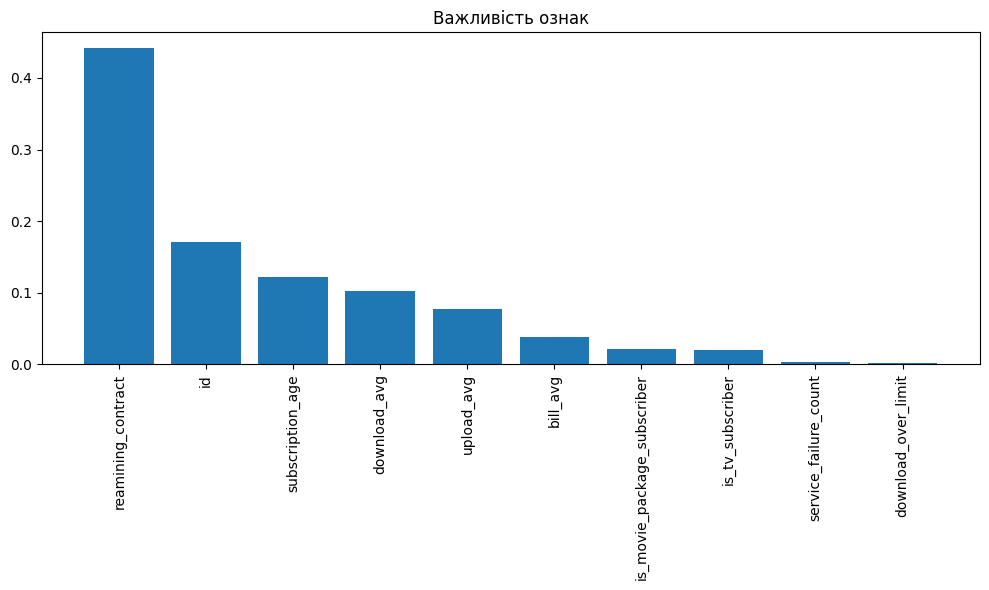

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Важливість ознак з моделі
importances = best_model.feature_importances_

# Відсортуємо ознаки за важливістю
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Виведемо важливість ознак
print("Важливість ознак:")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")

# Візуалізація важливості ознак
plt.figure(figsize=(10, 6))
plt.title("Важливість ознак")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [11]:
from google.colab import drive
drive.mount('/content/drive')

# Шлях до вашої папки на Google Диску
output_path = '/content/drive/My Drive/telecom_project/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

# Шлях до вашої папки на Google Диску
output_path = '/content/drive/My Drive/telecom_project/'

# Створення папки, якщо вона не існує
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Тепер можемо зберегти дані
# Збереження очищених і нормалізованих даних
processed_file = output_path + 'processed_data.csv'
data.to_csv(processed_file, index=False)
print(f"Оброблені дані збережено: {processed_file}")


Оброблені дані збережено: /content/drive/My Drive/telecom_project/processed_data.csv


In [14]:
import pickle

# Збереження налаштованої моделі Random Forest
model_file = output_path + 'random_forest_model.pkl'
with open(model_file, 'wb') as f:
    pickle.dump(best_model, f)

print(f"Модель збережено: {model_file}")


Модель збережено: /content/drive/My Drive/telecom_project/random_forest_model.pkl


In [15]:
# Збереження важливості ознак у CSV форматі
importances_file = output_path + 'feature_importances.csv'
importances_data = pd.DataFrame({'Feature': features[indices], 'Importance': importances[indices]})
importances_data.to_csv(importances_file, index=False)
print(f"Важливість ознак збережено: {importances_file}")


Важливість ознак збережено: /content/drive/My Drive/telecom_project/feature_importances.csv
